### The MODE

REFERENCES:-
https://www.tandfonline.com/doi/full/10.1080/10691898.2005.11910556

We learned that the mean takes into account each value in the distribution, and we saw that it's fairly easy to define the mean algebraically. These two properties make the mean far superior to the median. The median comes in handy, however, when it's not possible or appropriate to compute the mean.

In this mission we'll explore a couple of cases where neither the mean nor the median are suitable for finding an average value, and we'll learn an alternative summary metric.

In [6]:
import pandas as pd

houses = pd.read_table('./datasets/AmesHousing_1.txt')
houses.head()

# Explore the three columns below, to find it's scale of measurement
houses['Land Slope'].value_counts()
houses['Roof Style'].value_counts()
houses['Kitchen AbvGr'].value_counts()

print('Scale_land = ', 'ordinal')
print('Scale_roof = ', 'nominal')
print('Kitchen_variable = ', 'discrete')


Scale_land =  ordinal
Scale_roof =  nominal
Kitchen_variable =  discrete


In [8]:
print(houses['Land Slope'].unique())
houses['Land Slope'].value_counts()

['Gtl' 'Mod' 'Sev']


Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64

#### The MODE for Ordinal Variables

We found that the Land Slope variable is **ordinal**. We also found from your exploration that the values of this variable are represented using words.
As you may have already found in the documentation, **'Gtl'** means gentle slope, **'Mod'** means moderate slope, and **'Sev'** stands for 'Severe slope'.

We can't compute the mean for this variable because its values are words, not numbers. Remember that the definition of the mean is n∑i=1xin, so we can't compute the n∑i=1xi part if the values are words. We learned previously that the median is a good workaround for ordinal data, but the values of this ordinal variable are not numbers. Can we still compute the median?

If we sort the values of the Land Slope variable, we can find that the middle two values are **['Gtl', 'Gtl']** (the variable has an even number of values). Although we can't take their mean, it's intuitively clear that the average of two identical values is one of those values, so the median value should be 'Gtl'.

However, if the two middle values were **['Gtl', 'Mod']**, then it wouldn't be clear at all what to choose for the median. In cases like this, one workaround for finding an average value is to measure the most frequent value in the distribution. **For the Land Slope variable, we can see that the value 'Gtl' has the greatest frequency.**

**We call the most frequent value in the distribution the mode. So the mode of the Land Slope variable is 'Gtl'. In other words, the typical house has a gentle slope. Very importantly, notice that the mode is the most frequent value in the distribution, not the frequency of that value — so the mode is 'Gtl', not 2789.**

Just like for the median, there's no standard notation for the mode. It's also worth noting that the mode is not defined algebraically.



In [10]:
# Write a function that takes in an array of values (including strings) and returns the mode of that array.
def mode(array):
    counts = {}

    for value in array:
        if value in counts:
            counts[value]+=1
        else:
            counts[value]=1

    return max(counts, key=counts.get)


mode_function = mode(houses['Land Slope'])
mode_method = houses['Land Slope'].mode()
same = (mode_function == mode_method)    
same

0    True
dtype: bool

#### The MODE for Nominal Variables

We learned that the mode is ideal for ordinal data represented using words. The mode is also a good choice for nominal data. Let's consider the Roof Style variable, which is measured on a nominal scale and describes the roof type of a house.

We obviously can't compute the mean for this variable because the values are words. Even if they were coded as numbers, it'd be completely wrong to compute the mean because in the case of nominal variables the numbers describe qualities, not quantities.

In the previous mission, we made the case that we could compute the mean for ordinal variables if the values are numbers. This reasoning doesn't extend to nominal variables because they don't describe quantities, like ordinal variables do.

![title](./img/mode/1_mode.png)

Because the Roof Style variable is nominal, there's also no inherent order of the values in the distribution. This means that we can't sort the values in an ascending or descending order. The first step in computing the median is to sort the values in ascending order, which means we can't compute the median for the Roof Style variable.

In [12]:
# Edit the above function to return both the mode of an array and the dictionary containing the count for each unique value in the array.

def mode(array):
    counts = {}

    for value in array:
        if value in counts:
            counts[value]+=1
        else:
            counts[value]=1

    return max(counts, key=counts.get)

# This exercise gives a better understanding of what happens under the hood when we run Series.value_counts()
def mode(array):
    counts = {}

    for value in array:
        if value in counts:
            counts[value]+=1
        else:
            counts[value]=1

    return (max(counts, key=counts.get), counts)

mode, value_counts = mode(houses['Roof Style'])  

print('Value-Counts - ',value_counts)  
print('\n')
print('Mode - ',mode)

Value-Counts -  {'Hip': 551, 'Gable': 2321, 'Mansard': 11, 'Gambrel': 22, 'Shed': 5, 'Flat': 20}


Mode -  Gable


#### The MODE for Discrete Variables

There are some cases where computing the mean and the median is possible and correct, but the mode is preferred nonetheless. This is sometimes the case for discrete variables.

To remind you from the first course, **variables measured on interval or ratio scales can also be classified as discrete or continuous. A variable is discrete if there's no possible intermediate value between any two adjacent values.** Let's take for instance the Kitchen AbvGr variable, which describes the number of kitchens in a house.

Let's say we need to write an article about the house market in Ames, Iowa, and our main target audience are regular adult citizens from Ames. Among other aspects, we want to describe how many kitchens the typical house has. If we take the mean, we'd need to write that the typical house has 1.04 kitchens. This wouldn't make much sense for the regular reader, who expects the number of kitchens to be a whole number, not a decimal.

The median is 1 — a value much easier to grasp by non-technical people compared to 1.04. But this is a lucky case because the middle two values in the sorted distribution could have been [1,2], and then the median would have been 1.5. The mode is a safer choice for cases like this because it guarantees a whole number from the distribution.

The mode of the Kitchen AbvGr variable is 1. When we report this result, we should avoid technical jargon (like "mode" or "variable") and simply say that the typical house on the market has one kitchen.

Note that the mode is also guaranteed to be a value from the distribution (this holds true for any kind of variable). This doesn't apply to the mean or the median, which can return values that are not present in the actual distribution. For instance, the mean of the Kitchen AbvGr is 1.04, but the value 1.04 is not present in the distribution.

**The mean and the median generally summarize the distribution of a discrete variable much better than the mode, and you should use the mode only if you need to communicate your results to a non-technical audience.**

![title](./img/mode/2_mode.png)


In [14]:
print(houses['Kitchen AbvGr'].value_counts().sort_index())

0       3
1    2796
2     129
3       2
Name: Kitchen AbvGr, dtype: int64


In [16]:
# Explore the Bedroom AbvGr variable, and find whether it's discrete or continuous. 
houses['Bedroom AbvGr'].value_counts()
bedroom_variable = 'discrete'
bedroom_mode = houses['Bedroom AbvGr'].mode()
print(bedroom_mode)

# Find whether the SalePrice variable is discrete or continuous.
houses['SalePrice'].value_counts()
price_variable = 'continuous'

0    3
dtype: int64


#### Special Cases

There are distributions that can have more than one mode. Let's say we sampled the Kitchen AbvGr column and got this distribution of eight sample points:

**[0,1,1,1,2,2,2,3]**

The two most frequent values are 1 and 2 (both occur in the distribution three times), which means that this distribution has two modes (1 and 2). For this reason, we call this distribution **bimodal (the prefix "bi-" means "twice").** If the distribution had only one mode, we'd call it **unimodal (the prefix "uni-" means "only one").**

There's nothing wrong with having two modes. For our case above, the two modes tell us that the typical house on the market has either one or two kitchens.

It's not excluded to have a distribution with more than two modes. Let's say we sampled from another column, Bedroom AbvGr, and got this distribution of 10 sample points:

**[0,1,1,2,2,3,3,4,4,8]**

Note that this distribution has four modes: 1, 2, 3, and 4 (each occurs twice in the distribution). When a distribution has more than two modes, we say that the distribution is **multimodal (the prefix "multi-" means many).**

We can also have cases when there is no mode at all. Let's say we sample again from the Bedroom AbvGr column and get this distribution of 8 sample points:

**[1,1,2,2,3,3,4,4]**

Each unique value occurs twice in the distribution above, so there's no value (or values) that occurs more often than others. For this reason, this distribution doesn't have a mode. Contextually, we could say that there's no typical house on the market with respect to the number of bedrooms.

Distributions without a mode are often specific to continuous variables. It's quite rare to find two identical values in a continuous distribution (especially if we have decimal numbers), so the frequency of each unique value is usually 1. Even if we find identical values, their frequency is very likely to be too low to produce a meaningful mode value.

**The workaround is to organize the continuous variable in a grouped frequency table, and select for the mode the midpoint of the class interval (the bin) with the highest frequency. This method has its limitations, but it generally gives reasonable answers. Let's try to get a better grasp of how this works in the following exercise.**

In [18]:
# Find the class interval with the highest frequency
intervals = pd.interval_range(start = 0, end = 800000, freq = 100000)
gr_freq_table = pd.Series([0,0,0,0,0,0,0,0], index = intervals)

for value in houses['SalePrice']:
    for interval in intervals:
        if value in interval:
            gr_freq_table.loc[interval] += 1
            break

print(gr_freq_table, '\n')

houses['SalePrice'].value_counts()

(0, 100000]          252
(100000, 200000]    1821
(200000, 300000]     627
(300000, 400000]     166
(400000, 500000]      47
(500000, 600000]      11
(600000, 700000]       4
(700000, 800000]       2
dtype: int64 



135000    34
140000    33
130000    29
155000    28
145000    26
          ..
256300     1
274725     1
332200     1
57625      1
169985     1
Name: SalePrice, Length: 1032, dtype: int64

The class interval with the highest frequency is **(100000, 200000]    1821 ** 
So the midpoint is 150000, which becomes the MODE.

In [20]:
mode = 150000
mean = houses['SalePrice'].mean()
median = houses['SalePrice'].median()

print('Mode -', mode, 'Median - ', median, 'Mean - ', mean, '\n')

print('The mode is lower than the median, and the median is lower than the mean - ',True)
print('The mean is greater than the median, and the median is greater than the mode - ',True)

Mode - 150000 Median -  160000.0 Mean -  180796.0600682594 

The mode is lower than the median, and the median is lower than the mean -  True
The mean is greater than the median, and the median is greater than the mode -  True


#### Skewed Distributions

When we plot a histogram or a kernel density plot to visualize the shape of a distribution, the mode will always be the peak of the distribution. In the code below, we plot a kernel density plot to visualize the shape of the SalePrice variable and:

* Set the limits of the x-axis using the xlim parameter — the lowest limit is the minimum value in the SalePrice variable, and the upper limit is the maximum value.
* Plot a vertical line to indicate the position of the mode (note that our estimate of 150000 from the last exercise is quite close to the peak of the distribution).

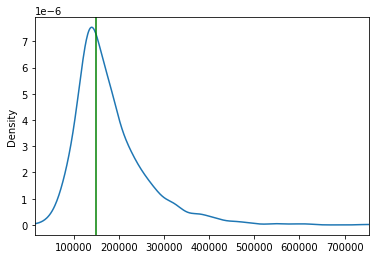

In [22]:
import matplotlib.pyplot as plt

houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                     houses['SalePrice'].max()
                                     )
                            )

plt.axvline(150000, color = 'Green')                            

This distribution is clearly right skewed. Generally, the location of the mode, median and mean is predictable for a right-skewed distribution.
Most values are concentrated in the left body of the distribution where they will form a peak — this is where the mode will be.
Remember that the median divides a distribution in two halves of equal length. For this reason, the median is usually positioned slightly right from the peak (the mode) for a right-skewed distribution.
The mean takes into account each value in the distribution, and it will be affected by the outliers in the right tail. This will generally pull the mean to the right of the median.

So in a right-skewed distribution, the mean will usually be to the right of the median, and the median will be to the right of the mode. This holds true for the distribution of the SalePrice variable:

12789 755000


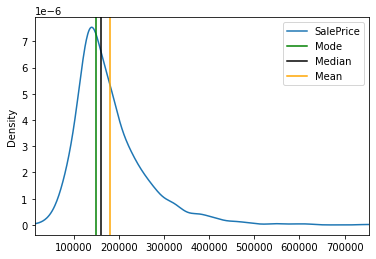

In [24]:
min = houses['SalePrice'].min()
max = houses['SalePrice'].max()

print(min, max)

houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                     houses['SalePrice'].max()
                                    )
                            )
plt.axvline(150000, color = 'Green', label = 'Mode')
plt.axvline(houses['SalePrice'].median(), color = 'Black', label = 'Median')
plt.axvline(houses['SalePrice'].mean(), color = 'Orange', label = 'Mean')
plt.legend()

For a left-skewed distribution, the direction is simply reversed: the mean is positioned to the left of the median, and the median to the left of the mode. This is obvious on the distribution of the Year Built variable.
These patterns generally hold true for most skewed distributions, but Paul von Hippel showed in a relatively recent [paper](https://www.tandfonline.com/doi/full/10.1080/10691898.2005.11910556) that this rule of thumb has a few exceptions.

In [26]:
# Create a grouped frequency table for the SalePrice variable
import numpy as np

intervals = pd.interval_range(start = 1872, end = 2010, freq = 10)
gr_freq_table = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0], index = intervals)
#gr_freq_table = pd.Series((np.linspace(1872, 2010, 27)),  index = intervals)

for value in houses['Year Built']:
    for interval in intervals:
        if value in interval:
            gr_freq_table.loc[interval] += 1
            break

print(gr_freq_table, '\n')

houses['Year Built'].value_counts()

(1872, 1882]      8
(1882, 1892]     11
(1892, 1902]     38
(1902, 1912]     57
(1912, 1922]    145
(1922, 1932]    150
(1932, 1942]    136
(1942, 1952]    160
(1952, 1962]    372
(1962, 1972]    372
(1972, 1982]    287
(1982, 1992]    134
(1992, 2002]    406
dtype: int64 



2005    142
2006    138
2007    109
2004     99
2003     88
       ... 
1875      1
1907      1
1911      1
1913      1
1872      1
Name: Year Built, Length: 118, dtype: int64

So the **Mode** is 2005 for **Year Built**

1872 2010


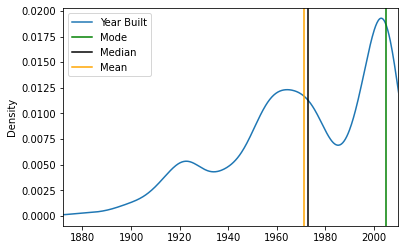

In [27]:
min = houses['Year Built'].min()
max = houses['Year Built'].max()

print(min, max)

houses['Year Built'].plot.kde(xlim = (houses['Year Built'].min(),
                                     houses['Year Built'].max()
                                    )
                            )
plt.axvline(2005, color = 'Green', label = 'Mode')
plt.axvline(houses['Year Built'].median(), color = 'Black', label = 'Median')
plt.axvline(houses['Year Built'].mean(), color = 'Orange', label = 'Mean')
plt.legend()

In [28]:
distribution_1 = {'mean': 3021 , 'median': 3001, 'mode': 2947}
distribution_2 = {'median': 924 , 'mode': 832, 'mean': 962}
distribution_3 = {'mode': 202, 'mean': 143, 'median': 199}

shape_1 = 'right skew'
shape_2 = 'right skew'
shape_3 = 'left skew'

#### Symmetrical Distributions

The location of the mean, median, and mode are also predictable for symmetrical distributions. Remember from the last course that if the shape of a distribution is symmetrical, then we can divide the distribution in two halves that are mirror images of one another:

![title](./img/mode/3_mode.png)

The median divides the distribution in two equal halves. As a consequence, the median will always be at the center of a perfectly symmetrical distribution because only a line drawn at the center can divide the distribution in two equal halves.

For a perfectly symmetrical distribution, the two equal halves will bear the same weight when computing the mean because the mean takes into account equally each value in the distribution. The mean is not pulled neither to the left, nor to the right, and stays instead in the center, at the same location as the median. The mean and the median are always equal for any perfectly symmetrical distribution.

Although the mean and the median have a constant location for every symmetrical distribution (no matter the shape), the location of the mode can change. The mode is where the peak is, so for a normal distribution the mode will be at the center, right where the mean and the median are.

![title](./img/mode/4_mode.png)

![title](./img/mode/5_mode.png)

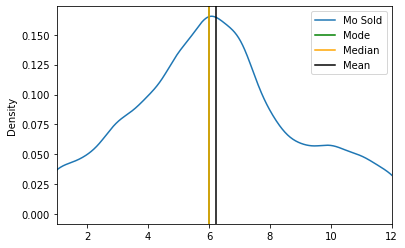

In [32]:
import matplotlib.pyplot as plt

houses['Mo Sold'].plot.kde(xlim=[1, 12])

plt.axvline(houses['Mo Sold'].mode()[0], color = 'Green', label = 'Mode')
plt.axvline(houses['Mo Sold'].median(), color = 'Orange', label = 'Median')
plt.axvline(houses['Mo Sold'].mean(), color = 'Black', label = 'Mean')
plt.legend()


![title](./img/1_summary.png)